In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from joblib import dump, load


Load Data for the cluster 

In [3]:
poplist=pd.read_csv('hitlist_cluster.csv')
poplist=poplist.drop('Unnamed: 0',axis=1)
clusterlist=poplist[['danceability','energy','key',	'loudness',	'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature', 'duration_ms']]
display(clusterlist.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,0.445,0.731,9,-11.044,1,0.3330,0.859,0.310,0.775,0.951,180.067,4,179987
1,0.667,0.250,11,-18.533,1,0.2170,0.757,0.000,0.250,0.412,144.145,4,155902
2,0.614,0.576,1,-12.634,0,0.0516,0.864,0.464,0.298,0.875,124.709,4,163133
3,0.419,0.331,3,-10.497,1,0.0293,0.932,0.000,0.102,0.322,80.647,4,160093
4,0.429,0.130,0,-15.570,0,0.0319,0.934,0.940,0.124,0.189,85.193,4,163379


Scale Data and save the scaling

In [4]:
scalar=StandardScaler()
X_prep = scalar.fit_transform(clusterlist)
dump(scalar, 'std_scaler.bin', compress=True)



['std_scaler.bin']

define PCA Model

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca=pca.fit_transform(X_prep)

Clustering using K_mean

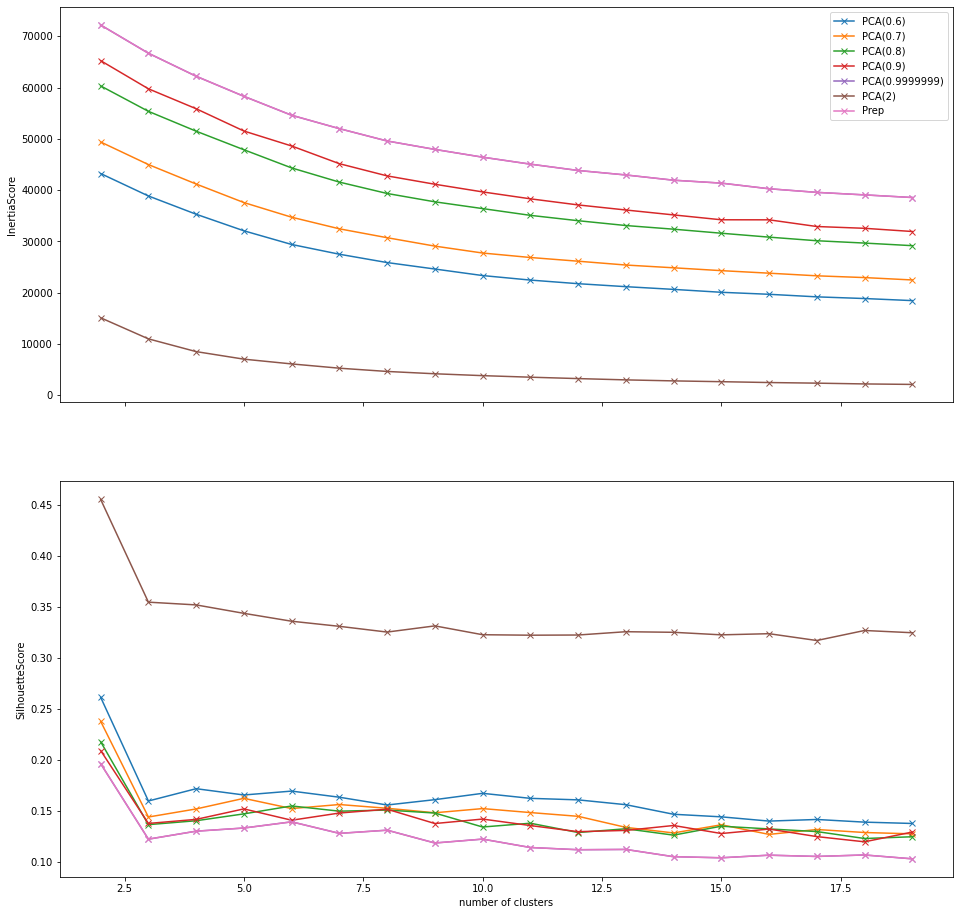

In [6]:
eigv=pca.explained_variance_ratio_
sum_eigv=np.cumsum(eigv)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(16,16))

K = range(2, 20)
pca_num=[0.6,0.7,0.8,0.9,0.9999999,2]

for p in pca_num:
    inertia = []
    silhouette= []
    pca = PCA(p)
    X_pca=pca.fit_transform(X_prep)
    for k in K:
        kmeans = cluster.KMeans(n_clusters=k,random_state=73)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X_pca, kmeans.predict(X_pca)))
    ax1.plot(K,inertia,'x-',label='PCA('+str(p)+')')  
    ax2.plot(K,silhouette,'x-')


inertia = []
silhouette= []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,random_state=73)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
ax1.plot(K,inertia,'x-',label='Prep') 
ax2.plot(K,silhouette,'x-')    
ax2.set_xlabel('number of clusters')
ax1.set_ylabel('InertiaScore')
ax2.set_ylabel('SilhouetteScore')
ax1.legend()
plt.show() 



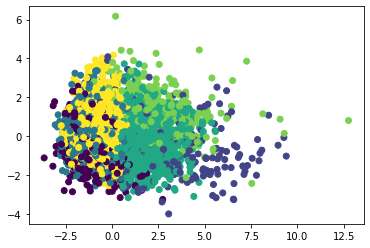

In [7]:

# X_pca=pca.fit_transform(X_prep)
kmeans = cluster.KMeans(n_clusters=6,random_state=73)
kmeans.fit(X_prep)
clusters=kmeans.predict(X_prep)
pca = PCA()
X_pca=pca.fit_transform(X_prep)
plt.scatter(X_pca[:,0],X_pca[:,1], c = clusters)
plt.show()

In [8]:
pca.explained_variance_ratio_

array([0.21784265, 0.10332577, 0.09460637, 0.08627887, 0.07719529,
       0.07621702, 0.07313938, 0.06757861, 0.06221664, 0.05873696,
       0.03694654, 0.03252446, 0.01339143])

Because there does not exist PCA-eigenvalues which are not very small, the PCA models  only help to detect different clusters.
Here we choose KMeans 6 cluster.

In [9]:
dump(kmeans, 'KMeans_cluster.bin', compress=True)

['KMeans_cluster.bin']

Save Clustering in a data 

In [10]:

poplist['cluster']=clusters
poplist.to_csv('hitlist_clustered.csv',index=False)

In [30]:
dict={'danceability': 0.445,'energy':0.731,	'key': 9,'loudness':-11.044,'mode':1,'speechiness':0.3330 ,'acousticness':0.859,'instrumentalness':0.310,'liveness':0.775,'valence':0.951,'tempo':180.067,'time_signature':4,'duration_ms':179987}

flist=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature', 'duration_ms']		
fs=[]
for x in flist:
    fs.append(dict[x])
fs=np.array([fs,fs])
fs=scalar.transform(fs)
out=kmeans.predict(fs)
out[0]


C:\Users\lahrm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0